In [1]:
import torch
import numpy as np
import torch.nn as nn
import matplotlib.pyplot as plt

In [2]:
import os    
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

### Trying Simple 1 depth neural decision Tree for a Toy Dataset

In [3]:
x=np.arange(-10,10)
y=[]
for i in range(x.shape[0]):
    if(x[i]<5):
        y.append(0)
    else:
        y.append(1)

In [4]:
y=np.array(y)
y=y.astype("float32")
y=torch.tensor(y)
x=x.astype("float32")
x=torch.tensor(x)

In [5]:
x

tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.])

In [6]:
y

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.,
        1., 1.])

In [7]:
class nntree(nn.Module):
    def __init__(self):
        super().__init__()
        self.t1=nn.Parameter(torch.randn(1))
        self.b1=nn.Parameter(torch.randn(1))
        self.relu=nn.ReLU()
        self.softmax=nn.Softmax()
    def forward(self,x):
        x=self.t1*x+self.b1
        x1=self.relu(x)
        x2=self.relu(-x)
        x=torch.cat((x1,x2),0)
        x=self.softmax(x)
        return x
            

In [8]:
model=nntree()

In [9]:
criterion=nn.BCELoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.1)

In [10]:
num_epochs=100
epoch=0
for epoch in range(num_epochs):
    loss=0
    for i in range(20):
        output=model(x[i])
        loss+=criterion(output[0],y[i])
        
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    print(loss)
    

C:\Users\srika\AppData\Local\Temp\ipykernel_5336\2928045597.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x=self.softmax(x)


tensor(12.1764, grad_fn=<AddBackward0>)
tensor(10.9031, grad_fn=<AddBackward0>)
tensor(9.6637, grad_fn=<AddBackward0>)
tensor(8.4666, grad_fn=<AddBackward0>)
tensor(7.3225, grad_fn=<AddBackward0>)
tensor(6.2459, grad_fn=<AddBackward0>)
tensor(5.2563, grad_fn=<AddBackward0>)
tensor(4.3804, grad_fn=<AddBackward0>)
tensor(3.6538, grad_fn=<AddBackward0>)
tensor(3.1232, grad_fn=<AddBackward0>)
tensor(2.8415, grad_fn=<AddBackward0>)
tensor(2.8472, grad_fn=<AddBackward0>)
tensor(3.1108, grad_fn=<AddBackward0>)
tensor(3.4832, grad_fn=<AddBackward0>)
tensor(3.7552, grad_fn=<AddBackward0>)
tensor(3.8063, grad_fn=<AddBackward0>)
tensor(3.6478, grad_fn=<AddBackward0>)
tensor(3.3638, grad_fn=<AddBackward0>)
tensor(3.0486, grad_fn=<AddBackward0>)
tensor(2.7726, grad_fn=<AddBackward0>)
tensor(2.5719, grad_fn=<AddBackward0>)
tensor(2.4523, grad_fn=<AddBackward0>)
tensor(2.4012, grad_fn=<AddBackward0>)
tensor(2.3975, grad_fn=<AddBackward0>)
tensor(2.4198, grad_fn=<AddBackward0>)
tensor(2.4500, grad_fn=

In [11]:
for i in range(20):
    print(model(x[i]))
    

tensor([3.4833e-08, 1.0000e+00], grad_fn=<SoftmaxBackward0>)
tensor([1.1587e-07, 1.0000e+00], grad_fn=<SoftmaxBackward0>)
tensor([3.8545e-07, 1.0000e+00], grad_fn=<SoftmaxBackward0>)
tensor([1.2822e-06, 1.0000e+00], grad_fn=<SoftmaxBackward0>)
tensor([4.2653e-06, 1.0000e+00], grad_fn=<SoftmaxBackward0>)
tensor([1.4189e-05, 9.9999e-01], grad_fn=<SoftmaxBackward0>)
tensor([4.7197e-05, 9.9995e-01], grad_fn=<SoftmaxBackward0>)
tensor([1.5699e-04, 9.9984e-01], grad_fn=<SoftmaxBackward0>)
tensor([5.2203e-04, 9.9948e-01], grad_fn=<SoftmaxBackward0>)
tensor([0.0017, 0.9983], grad_fn=<SoftmaxBackward0>)
tensor([0.0057, 0.9943], grad_fn=<SoftmaxBackward0>)
tensor([0.0189, 0.9811], grad_fn=<SoftmaxBackward0>)
tensor([0.0601, 0.9399], grad_fn=<SoftmaxBackward0>)
tensor([0.1754, 0.8246], grad_fn=<SoftmaxBackward0>)
tensor([0.4144, 0.5856], grad_fn=<SoftmaxBackward0>)
tensor([0.7019, 0.2981], grad_fn=<SoftmaxBackward0>)
tensor([0.8868, 0.1132], grad_fn=<SoftmaxBackward0>)
tensor([0.9630, 0.0370], gr

C:\Users\srika\AppData\Local\Temp\ipykernel_5336\2928045597.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x=self.softmax(x)


In [12]:
for name, param in model.named_parameters():
    if param.requires_grad:
        print(name, param.data)

t1 tensor([1.2019])
b1 tensor([-5.1534])


In [13]:
x

tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.])

In [14]:
y

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.,
        1., 1.])

### Trying Depth 2 neural decision Tree

In [15]:
x=np.arange(-10,10)
y=[]
for i in range(x.shape[0]):
    if(x[i]<5 and x[i]>=0):
        y.append(0)
    else:
        y.append(1)

In [16]:
y=np.array(y)
y=y.astype("float32")
y=torch.tensor(y)
x=x.astype("float32")
x=torch.tensor(x)

In [17]:
x

tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.])

In [18]:
y

tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1.,
        1., 1.])

In [19]:
class nntree2(nn.Module):
    def __init__(self):
        super().__init__()
        self.t1=nn.Parameter(torch.randn(1))
        self.b1=nn.Parameter(torch.randn(1))
        self.t11=nn.Parameter(torch.randn(1))
        self.b11=nn.Parameter(torch.randn(1))
        self.t12=nn.Parameter(torch.randn(1))
        self.b12=nn.Parameter(torch.randn(1))
        self.relu=nn.ReLU()
        self.softmax=nn.Softmax()
    def forward(self,x):
        o=self.t1*x+self.b1
        o1=torch.max(torch.tensor(0.01),self.relu(o))
        o2=torch.max(torch.tensor(0.01),self.relu(-o))
        o1=o1*(self.t11*x+self.b11)
        o2=o2*(self.t12*x+self.b12)
        o11=torch.max(torch.tensor(0.01),self.relu(o1))
        o12=torch.max(torch.tensor(0.01),self.relu(-o1))
        o21=torch.max(torch.tensor(0.01),self.relu(o2))
        o22=torch.max(torch.tensor(0.01),self.relu(-o2))
        p1=o11+o21
        p2=o12+o22 
        f=torch.cat((p1,p2),0)
        f=self.softmax(f)
        return f

In [20]:
model1=nntree2()

In [21]:
model1(x[0])

C:\Users\srika\AppData\Local\Temp\ipykernel_5336\764618393.py:25: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f=self.softmax(f)


tensor([0.8939, 0.1061], grad_fn=<SoftmaxBackward0>)

In [22]:
criterion=nn.BCELoss()
optimizer=torch.optim.Adam(model1.parameters(),lr=0.1)

In [23]:
num_epochs=1000
epoch=0
for epoch in range(num_epochs):
    loss=0
    for i in range(20):
        output=model1(x[i])
        loss+=criterion(output[0],y[i])
        
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    print(loss)
    

C:\Users\srika\AppData\Local\Temp\ipykernel_5336\764618393.py:25: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f=self.softmax(f)


tensor(11.2552, grad_fn=<AddBackward0>)
tensor(9.8159, grad_fn=<AddBackward0>)
tensor(6.2856, grad_fn=<AddBackward0>)
tensor(7.4188, grad_fn=<AddBackward0>)
tensor(7.7036, grad_fn=<AddBackward0>)
tensor(6.5024, grad_fn=<AddBackward0>)
tensor(5.4434, grad_fn=<AddBackward0>)
tensor(5.7863, grad_fn=<AddBackward0>)
tensor(6.0278, grad_fn=<AddBackward0>)
tensor(5.7707, grad_fn=<AddBackward0>)
tensor(5.2183, grad_fn=<AddBackward0>)
tensor(4.5802, grad_fn=<AddBackward0>)
tensor(4.5240, grad_fn=<AddBackward0>)
tensor(4.6353, grad_fn=<AddBackward0>)
tensor(4.6050, grad_fn=<AddBackward0>)
tensor(4.3632, grad_fn=<AddBackward0>)
tensor(3.9742, grad_fn=<AddBackward0>)
tensor(3.5631, grad_fn=<AddBackward0>)
tensor(3.3477, grad_fn=<AddBackward0>)
tensor(3.2812, grad_fn=<AddBackward0>)
tensor(3.2187, grad_fn=<AddBackward0>)
tensor(3.0448, grad_fn=<AddBackward0>)
tensor(2.7629, grad_fn=<AddBackward0>)
tensor(2.4681, grad_fn=<AddBackward0>)
tensor(2.3159, grad_fn=<AddBackward0>)
tensor(2.2418, grad_fn=<

tensor(0.0182, grad_fn=<AddBackward0>)
tensor(0.0181, grad_fn=<AddBackward0>)
tensor(0.0179, grad_fn=<AddBackward0>)
tensor(0.0178, grad_fn=<AddBackward0>)
tensor(0.0176, grad_fn=<AddBackward0>)
tensor(0.0175, grad_fn=<AddBackward0>)
tensor(0.0174, grad_fn=<AddBackward0>)
tensor(0.0172, grad_fn=<AddBackward0>)
tensor(0.0171, grad_fn=<AddBackward0>)
tensor(0.0170, grad_fn=<AddBackward0>)
tensor(0.0168, grad_fn=<AddBackward0>)
tensor(0.0167, grad_fn=<AddBackward0>)
tensor(0.0166, grad_fn=<AddBackward0>)
tensor(0.0165, grad_fn=<AddBackward0>)
tensor(0.0163, grad_fn=<AddBackward0>)
tensor(0.0162, grad_fn=<AddBackward0>)
tensor(0.0161, grad_fn=<AddBackward0>)
tensor(0.0160, grad_fn=<AddBackward0>)
tensor(0.0158, grad_fn=<AddBackward0>)
tensor(0.0157, grad_fn=<AddBackward0>)
tensor(0.0156, grad_fn=<AddBackward0>)
tensor(0.0155, grad_fn=<AddBackward0>)
tensor(0.0154, grad_fn=<AddBackward0>)
tensor(0.0153, grad_fn=<AddBackward0>)
tensor(0.0152, grad_fn=<AddBackward0>)
tensor(0.0151, grad_fn=<A

tensor(0.0052, grad_fn=<AddBackward0>)
tensor(0.0052, grad_fn=<AddBackward0>)
tensor(0.0052, grad_fn=<AddBackward0>)
tensor(0.0052, grad_fn=<AddBackward0>)
tensor(0.0051, grad_fn=<AddBackward0>)
tensor(0.0051, grad_fn=<AddBackward0>)
tensor(0.0051, grad_fn=<AddBackward0>)
tensor(0.0051, grad_fn=<AddBackward0>)
tensor(0.0051, grad_fn=<AddBackward0>)
tensor(0.0050, grad_fn=<AddBackward0>)
tensor(0.0050, grad_fn=<AddBackward0>)
tensor(0.0050, grad_fn=<AddBackward0>)
tensor(0.0050, grad_fn=<AddBackward0>)
tensor(0.0050, grad_fn=<AddBackward0>)
tensor(0.0049, grad_fn=<AddBackward0>)
tensor(0.0049, grad_fn=<AddBackward0>)
tensor(0.0049, grad_fn=<AddBackward0>)
tensor(0.0049, grad_fn=<AddBackward0>)
tensor(0.0049, grad_fn=<AddBackward0>)
tensor(0.0048, grad_fn=<AddBackward0>)
tensor(0.0048, grad_fn=<AddBackward0>)
tensor(0.0048, grad_fn=<AddBackward0>)
tensor(0.0048, grad_fn=<AddBackward0>)
tensor(0.0048, grad_fn=<AddBackward0>)
tensor(0.0048, grad_fn=<AddBackward0>)
tensor(0.0047, grad_fn=<A

tensor(0.0024, grad_fn=<AddBackward0>)
tensor(0.0024, grad_fn=<AddBackward0>)
tensor(0.0024, grad_fn=<AddBackward0>)
tensor(0.0024, grad_fn=<AddBackward0>)
tensor(0.0024, grad_fn=<AddBackward0>)
tensor(0.0024, grad_fn=<AddBackward0>)
tensor(0.0024, grad_fn=<AddBackward0>)
tensor(0.0024, grad_fn=<AddBackward0>)
tensor(0.0024, grad_fn=<AddBackward0>)
tensor(0.0024, grad_fn=<AddBackward0>)
tensor(0.0024, grad_fn=<AddBackward0>)
tensor(0.0024, grad_fn=<AddBackward0>)
tensor(0.0024, grad_fn=<AddBackward0>)
tensor(0.0023, grad_fn=<AddBackward0>)
tensor(0.0023, grad_fn=<AddBackward0>)
tensor(0.0023, grad_fn=<AddBackward0>)
tensor(0.0023, grad_fn=<AddBackward0>)
tensor(0.0023, grad_fn=<AddBackward0>)
tensor(0.0023, grad_fn=<AddBackward0>)
tensor(0.0023, grad_fn=<AddBackward0>)
tensor(0.0023, grad_fn=<AddBackward0>)
tensor(0.0023, grad_fn=<AddBackward0>)
tensor(0.0023, grad_fn=<AddBackward0>)
tensor(0.0023, grad_fn=<AddBackward0>)
tensor(0.0023, grad_fn=<AddBackward0>)
tensor(0.0023, grad_fn=<A

tensor(0.0014, grad_fn=<AddBackward0>)
tensor(0.0014, grad_fn=<AddBackward0>)
tensor(0.0014, grad_fn=<AddBackward0>)
tensor(0.0014, grad_fn=<AddBackward0>)
tensor(0.0014, grad_fn=<AddBackward0>)
tensor(0.0014, grad_fn=<AddBackward0>)
tensor(0.0014, grad_fn=<AddBackward0>)
tensor(0.0014, grad_fn=<AddBackward0>)
tensor(0.0014, grad_fn=<AddBackward0>)
tensor(0.0014, grad_fn=<AddBackward0>)
tensor(0.0014, grad_fn=<AddBackward0>)
tensor(0.0014, grad_fn=<AddBackward0>)
tensor(0.0014, grad_fn=<AddBackward0>)
tensor(0.0014, grad_fn=<AddBackward0>)
tensor(0.0014, grad_fn=<AddBackward0>)
tensor(0.0014, grad_fn=<AddBackward0>)
tensor(0.0014, grad_fn=<AddBackward0>)
tensor(0.0014, grad_fn=<AddBackward0>)
tensor(0.0014, grad_fn=<AddBackward0>)
tensor(0.0014, grad_fn=<AddBackward0>)
tensor(0.0014, grad_fn=<AddBackward0>)
tensor(0.0014, grad_fn=<AddBackward0>)
tensor(0.0014, grad_fn=<AddBackward0>)
tensor(0.0014, grad_fn=<AddBackward0>)
tensor(0.0014, grad_fn=<AddBackward0>)
tensor(0.0014, grad_fn=<A

In [24]:
for name, param in model1.named_parameters():
    if param.requires_grad:
        print(name, param.data)

t1 tensor([-0.7510])
b1 tensor([3.4103])
t11 tensor([-4.3939])
b11 tensor([-2.3771])
t12 tensor([4.6046])
b12 tensor([1.7004])


In [26]:
for i in range(20):
    print(model1(x[i]))

tensor([1., 0.], grad_fn=<SoftmaxBackward0>)
tensor([1., 0.], grad_fn=<SoftmaxBackward0>)
tensor([1., 0.], grad_fn=<SoftmaxBackward0>)
tensor([1., 0.], grad_fn=<SoftmaxBackward0>)
tensor([1., 0.], grad_fn=<SoftmaxBackward0>)
tensor([1., 0.], grad_fn=<SoftmaxBackward0>)
tensor([1.0000e+00, 5.4090e-43], grad_fn=<SoftmaxBackward0>)
tensor([1.0000e+00, 3.0051e-27], grad_fn=<SoftmaxBackward0>)
tensor([1.0000e+00, 2.2699e-14], grad_fn=<SoftmaxBackward0>)
tensor([9.9977e-01, 2.3320e-04], grad_fn=<SoftmaxBackward0>)
tensor([3.0658e-04, 9.9969e-01], grad_fn=<SoftmaxBackward0>)
tensor([1.6125e-08, 1.0000e+00], grad_fn=<SoftmaxBackward0>)
tensor([6.2325e-10, 1.0000e+00], grad_fn=<SoftmaxBackward0>)
tensor([1.7706e-08, 1.0000e+00], grad_fn=<SoftmaxBackward0>)
tensor([3.6963e-04, 9.9963e-01], grad_fn=<SoftmaxBackward0>)
tensor([9.9975e-01, 2.5262e-04], grad_fn=<SoftmaxBackward0>)
tensor([1.0000e+00, 1.4652e-14], grad_fn=<SoftmaxBackward0>)
tensor([1.0000e+00, 8.4214e-28], grad_fn=<SoftmaxBackward0>

C:\Users\srika\AppData\Local\Temp\ipykernel_5336\764618393.py:25: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f=self.softmax(f)


### For 2 D data

In [27]:
x1=np.arange(-10,10)
x2=np.arange(10,30)
x=np.vstack((x1.T,x2.T))

In [28]:
x=np.random.randn(20,2)

In [29]:
x

array([[ 0.2054849 ,  0.44982731],
       [-1.12585669,  0.23725532],
       [ 0.3077817 , -0.98609494],
       [ 0.90593091, -1.16985498],
       [ 1.45661587,  0.43641423],
       [-0.1720135 ,  0.44632114],
       [ 0.0574967 ,  0.51352617],
       [-1.65325237, -0.59153972],
       [-1.71928127,  0.52935686],
       [ 1.7443251 , -0.93387826],
       [ 0.87255749,  1.18694602],
       [ 0.03467632, -0.46456032],
       [ 0.88525734, -0.77978981],
       [-2.3937423 ,  1.0373066 ],
       [ 0.2738266 , -0.74505807],
       [-1.00738   ,  1.06071063],
       [-1.16363736, -0.56595318],
       [ 0.28025414, -0.00888372],
       [ 0.00708492, -2.277088  ],
       [ 0.53926414,  0.06574083]])

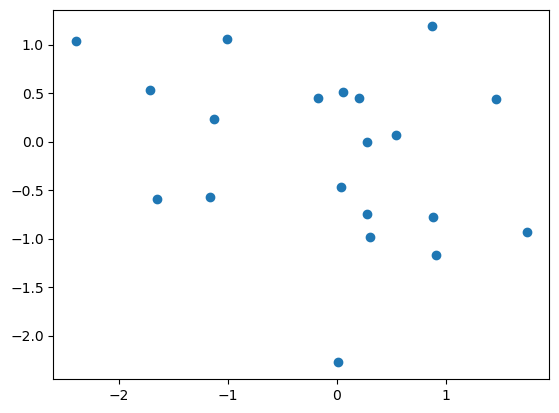

In [30]:
plt.scatter(x[:,0],x[:,1])
plt.show()

In [31]:
y=[]
for i in range(x.shape[0]):
    if(x[i][0]<0.5 and x[i][0]>-0.5):
        y.append(0)
    else:
        y.append(1)

In [32]:
y=np.array(y)
y=y.astype("float32")
y=torch.tensor(y)
x=x.astype("float32")
x=torch.tensor(x)

In [33]:
y

tensor([0., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0.,
        0., 1.])

In [34]:
class nntree3(nn.Module):
    def __init__(self):
        super().__init__()
        self.t1=nn.Parameter(torch.randn((1,2)))
        self.b1=nn.Parameter(torch.randn(1))
        self.t11=nn.Parameter(torch.randn((1,2)))
        self.b11=nn.Parameter(torch.randn(1))
        self.t12=nn.Parameter(torch.randn((1,2)))
        self.b12=nn.Parameter(torch.randn(1))
        self.relu=nn.ReLU()
        self.softmax=nn.Softmax(dim=1)
    def forward(self,x):
        o=self.t1@x+self.b1
        o1=torch.max(torch.tensor(0.01),self.relu(o))
        o2=torch.max(torch.tensor(0.01),self.relu(-o))
        o1=o1*(self.t11@x+self.b11)
        o2=o2*(self.t12@x+self.b12)
        o11=torch.max(torch.tensor(0.01),self.relu(o1))
        o12=torch.max(torch.tensor(0.01),self.relu(-o1))
        o21=torch.max(torch.tensor(0.01),self.relu(o2))
        o22=torch.max(torch.tensor(0.01),self.relu(-o2))
        p1=o11+o21
        p2=o12+o22 
        f=torch.cat((p1,p2),0)
        f=self.softmax(f.reshape(1,-1))
        return f

In [35]:
model2=nntree3()

In [36]:
criterion=nn.BCELoss()
optimizer=torch.optim.Adam(model2.parameters(),lr=0.1)

In [37]:
k=model2(x[0].reshape((2,1)))

In [38]:
num_epochs=100
epoch=0
for epoch in range(num_epochs):
    loss=0
    for i in range(20):
        output=model2(x[i].reshape((2,1)))
        loss+=criterion(output[0][0],y[i])
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    print(loss)
    

tensor(18.9019, grad_fn=<AddBackward0>)
tensor(13.4047, grad_fn=<AddBackward0>)
tensor(10.2946, grad_fn=<AddBackward0>)
tensor(8.8830, grad_fn=<AddBackward0>)
tensor(8.2447, grad_fn=<AddBackward0>)
tensor(7.9094, grad_fn=<AddBackward0>)
tensor(7.6168, grad_fn=<AddBackward0>)
tensor(7.3168, grad_fn=<AddBackward0>)
tensor(7.0124, grad_fn=<AddBackward0>)
tensor(6.8338, grad_fn=<AddBackward0>)
tensor(6.7005, grad_fn=<AddBackward0>)
tensor(6.5958, grad_fn=<AddBackward0>)
tensor(6.5879, grad_fn=<AddBackward0>)
tensor(6.6036, grad_fn=<AddBackward0>)
tensor(6.6087, grad_fn=<AddBackward0>)
tensor(6.5932, grad_fn=<AddBackward0>)
tensor(6.5525, grad_fn=<AddBackward0>)
tensor(6.4870, grad_fn=<AddBackward0>)
tensor(6.4023, grad_fn=<AddBackward0>)
tensor(6.3033, grad_fn=<AddBackward0>)
tensor(6.2375, grad_fn=<AddBackward0>)
tensor(6.2136, grad_fn=<AddBackward0>)
tensor(6.1925, grad_fn=<AddBackward0>)
tensor(6.1708, grad_fn=<AddBackward0>)
tensor(6.1453, grad_fn=<AddBackward0>)
tensor(6.1243, grad_fn

In [39]:
for name, param in model2.named_parameters():
    if param.requires_grad:
        print(name, param.data)

t1 tensor([[3.6601, 1.5484]])
b1 tensor([-1.0240])
t11 tensor([[ 4.5103, -2.6238]])
b11 tensor([0.3006])
t12 tensor([[-1.7381,  1.1924]])
b12 tensor([-0.8463])


In [40]:
count=0
for i in range(20):
    c=0
    if(model2(x[i].reshape((2,1)))[0][0]>0.5):
        c=1
    else:
        c=0
    if(y[i]==c):
        count+=1

In [41]:
count

19

## General n depth tree for multidimensional data

In [58]:
class nntree_gen(nn.Module):
    def __init__(self,dim,depth):
        super().__init__()
        self.dim=dim
        self.depth = depth
        self.t= nn.ParameterList([])
        self.b= nn.ParameterList([])
        for i in range(self.depth):
            for j in range(2**i):
                t1=nn.Parameter(torch.randn(1,dim))
                self.t.append(t1)
                b1=nn.Parameter(torch.randn(1,1))
                self.b.append(b1)
        self.relu=nn.ELU(alpha=1.0, inplace=False)
        self.softmax=nn.Softmax(dim=1)
#         self.t=np.array(self.t)
#         self.b=np.array(self.b)
#         self.t=nn.Parameter(self.t)
#         self.b=nn.Parameter(self.b)
        
    def forward(self,x):
        curr_o=[]
        for i in range(self.depth):
            if(i==0):
                o=self.t[2**(i)-1]@x+self.b[2**(i)-1]
                curr_o.append(torch.max(torch.tensor(0.0),self.relu(o)))
                curr_o.append(torch.max(torch.tensor(0.0),self.relu(-o)))
            else:
                curr1_o=[]
                for j in range(2**(i)):
                    o=curr_o[j]*(self.t[2**(i)-1+j]@x+self.b[2**(i)-1+j])
                    o=o*(0.1)
                    curr1_o.append(torch.max(torch.tensor(0.0),self.relu(o)))
                    curr1_o.append(torch.max(torch.tensor(0.0),self.relu(-o)))
                    
                curr_o=curr1_o
        p1=0
        p2=0
#         print(curr_o)
        for i in range(len(curr_o)):
            if(i%2==0):
                p1+=curr_o[i]
                
            else:
                p2+=curr_o[i]
                    
                    
        f=torch.cat((p1,p2),0)
        f=self.softmax(f.reshape(1,-1))
        return f 

In [59]:
model3=nntree_gen(2,4)

In [60]:
criterion=nn.BCELoss()
optimizer=torch.optim.Adam(model3.parameters(),lr=0.1)

In [45]:
num_epochs=100
epoch=0
for epoch in range(num_epochs):
    loss=0
    for i in range(20):
        output=model3(x[i].reshape((2,1)))
        loss+=criterion(output[0][0],y[i])
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    print(loss)
    

tensor(13.8875, grad_fn=<AddBackward0>)
tensor(13.8641, grad_fn=<AddBackward0>)
tensor(13.8407, grad_fn=<AddBackward0>)
tensor(13.8095, grad_fn=<AddBackward0>)
tensor(13.7653, grad_fn=<AddBackward0>)
tensor(13.7031, grad_fn=<AddBackward0>)
tensor(13.6186, grad_fn=<AddBackward0>)
tensor(13.5082, grad_fn=<AddBackward0>)
tensor(13.3696, grad_fn=<AddBackward0>)
tensor(13.2026, grad_fn=<AddBackward0>)
tensor(13.0097, grad_fn=<AddBackward0>)
tensor(12.7975, grad_fn=<AddBackward0>)
tensor(12.5734, grad_fn=<AddBackward0>)
tensor(12.3441, grad_fn=<AddBackward0>)
tensor(12.1140, grad_fn=<AddBackward0>)
tensor(11.8858, grad_fn=<AddBackward0>)
tensor(11.6585, grad_fn=<AddBackward0>)
tensor(11.4339, grad_fn=<AddBackward0>)
tensor(11.2166, grad_fn=<AddBackward0>)
tensor(11.0114, grad_fn=<AddBackward0>)
tensor(10.8177, grad_fn=<AddBackward0>)
tensor(10.6340, grad_fn=<AddBackward0>)
tensor(10.4572, grad_fn=<AddBackward0>)
tensor(10.2837, grad_fn=<AddBackward0>)
tensor(10.1101, grad_fn=<AddBackward0>)


In [61]:
count=0
for i in range(20):
    c=0
    if(model3(x[i].reshape((2,1)))[0][0]>0.5):
        c=1
    else:
        c=0
    if(y[i]==c):
        count+=1

In [62]:
count

13

### Running on Iris Dataset

In [63]:
from sklearn import datasets
iris = datasets.load_iris() 
X_train = iris.data 
y_train = iris.target 
names = iris.target_names

In [64]:
X_train=X_train[:100,:]
y_train=y_train[:100]

In [65]:
import time

In [66]:
model3=nntree_gen(4,4)

In [67]:
criterion=nn.BCELoss()
optimizer=torch.optim.Adam(model3.parameters(),lr=0.01)

In [68]:
a=time.time()
from sklearn import tree
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_train,
    y_train,
    test_size=0.2,
    random_state=42,
)


clf = tree.DecisionTreeClassifier()
clf.fit(X=X_train, y=y_train)
b=time.time()
clf.feature_importances_ # [ 1.,  0.,  0.]
clf.score(X=X_test, y=y_test) # 1.0
clf.predict(X_test) # array([0, 0, 0, 3, 1, 0, 3, 0, 0, 3, 2, 2, 1, 3, 2, 0, 2, 0]) 

array([1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0])

In [69]:
b-a

0.00099945068359375

In [70]:
clf.score(X=X_test, y=y_test)

1.0

In [71]:
clf.feature_importances_ # [ 1.,  0.,  0.]

array([0., 0., 0., 1.])

In [72]:
X_train=torch.tensor(X_train.astype("float32"))
y_train=torch.tensor(y_train.astype("float32"))
X_test=torch.tensor(X_test.astype("float32"))
y_test=torch.tensor(y_test.astype("float32"))

In [73]:
num_epochs=20
epoch=0
for epoch in range(num_epochs):
    loss=0
    for i in range(80):
        output=model3(X_train[i].detach().numpy().reshape((4,1)))
        loss+=criterion(output[0][0], y_train[i])
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    print(loss)

RuntimeError: Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.

In [74]:
count=0
for i in range(20):
    c=0
    
    if(model3(X_test[i].reshape((4,1)))[0][0]>0.5):
        c=1
    else:
        c=0
    if(y_test[i]==c):
        count+=1
print(count)

12


### On higher dimensional Dataset (Binary)

In [75]:
class nntree_gen(nn.Module):
    def __init__(self,dim,depth):
        super().__init__()
        self.dim=dim
        self.depth = depth
        self.t= nn.ParameterList([])
        self.b= nn.ParameterList([])
        for i in range(self.depth):
            for j in range(2**i):
                t1=nn.Parameter(torch.randn(1,dim))
                self.t.append(t1)
                b1=nn.Parameter(torch.randn(1,1))
                self.b.append(b1)
        self.relu=nn.ELU(alpha=1.0, inplace=False)
        self.softmax=nn.Softmax(dim=1)
        
    def forward(self,x):
        curr_o=[]
        for i in range(self.depth):
            if(len(curr_o)==0):
                o=self.t[2**(i)-1]@x+self.b[2**(i)-1]
                curr_o.append(torch.max(torch.tensor(0.0),self.relu(o)))
                curr_o.append(torch.max(torch.tensor(0.0),self.relu(-o)))
            
            else:
                curr1_o=[]
                for j in range(2**(i)):
                    o=curr_o[j]*(torch.mm(self.t[2**(i)-1+j],x)+self.b[2**(i)-1+j])
                    o=o*(0.1)
                    curr1_o.append(torch.max(torch.tensor(0.0),self.relu(o)))
                    curr1_o.append(torch.max(torch.tensor(0.0),self.relu(-o)))
                    
                curr_o=curr1_o
        p1=0
        p2=0
        for i in range(len(curr_o)):
            if(i%2==0):
                p1+=curr_o[i]
                
            else:
                p2+=curr_o[i]
        f=torch.stack((p1,p2),0).reshape(2,x.shape[1])
        f=self.softmax(f.T)
        return f        

In [76]:
import pandas as pd


In [77]:
df=pd.read_csv("bank_dataset - Copy.csv")

In [78]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [79]:
df['job'] = df['job'].astype('category').cat.codes

In [80]:
df['cons.price.idx'].unique()

array([93.994, 94.465, 93.918, 93.444, 93.798, 93.2  , 92.756, 92.843,
       93.075, 92.893, 92.963, 92.469, 92.201, 92.379, 92.431, 92.649,
       92.713, 93.369, 93.749, 93.876, 94.055, 94.215, 94.027, 94.199,
       94.601, 94.767])

In [81]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [82]:
Categorical_variables=['job','marital','contact', 'poutcome','education', 'default', 'housing', 'loan', 'month',
       'day_of_week','y']


feature_scale=[feature for feature in df.columns if feature not in Categorical_variables]


scaler=StandardScaler()
scaler.fit(df[feature_scale])

StandardScaler()

In [83]:
scaled_data = pd.concat([df[['job','marital','contact', 'poutcome','education', 'default', 'housing', 'loan', 'month',
       'day_of_week','y']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(df[feature_scale]), columns=feature_scale)],
                    axis=1)
scaled_data.head()

,job,marital,contact,poutcome,education,default,housing,loan,month,day_of_week,...,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,3,married,telephone,nonexistent,basic.4y,no,no,no,may,mon,...,1.533034,0.010471,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168
1,7,married,telephone,nonexistent,high.school,unknown,no,no,may,mon,...,1.628993,-0.421501,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168
2,7,married,telephone,nonexistent,high.school,no,yes,no,may,mon,...,-0.290186,-0.124520,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168
3,0,married,telephone,nonexistent,basic.6y,no,no,no,may,mon,...,-0.002309,-0.413787,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168
4,7,married,telephone,nonexistent,high.school,no,no,yes,may,mon,...,1.533034,0.187888,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168


In [84]:
scaled_data['y']

0         no
1         no
2         no
3         no
4         no
        ... 
41183    yes
41184     no
41185     no
41186    yes
41187     no
Name: y, Length: 41188, dtype: object

In [85]:
df=scaled_data

In [86]:
df['marital'] = df['marital'].astype('category').cat.codes
df['contact'] = df['contact'].astype('category').cat.codes
df['poutcome'] = df['poutcome'].astype('category').cat.codes
df['education'] = df['education'].astype('category').cat.codes
df['default'] = df['default'].astype('category').cat.codes
df['housing'] = df['housing'].astype('category').cat.codes
df['loan'] = df['loan'].astype('category').cat.codes
df['month'] = df['month'].astype('category').cat.codes
df['day_of_week'] = df['day_of_week'].astype('category').cat.codes
df['y'] = df['y'].astype('category').cat.codes

In [87]:
df['job'].unique()

array([ 3,  7,  0,  1,  9,  5,  4, 10,  6, 11,  2,  8], dtype=int8)

In [88]:
col_indices = list(range(df.shape[1]))
col_indices.remove(df.columns.get_loc('y'))
X = df.iloc[:, col_indices]


In [89]:
y = df.loc[:, 'y']

In [90]:
X=X.iloc[:5000]
y=y.iloc[:5000]

In [91]:
from sklearn.metrics import f1_score

In [92]:
from sklearn import tree
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
)


clf = tree.DecisionTreeClassifier(random_state=42)

clf.fit(X=X_train, y=y_train)

y_pred = clf.predict(X_test)
f1_score(y_pred,y_test) # 1.0


0.3934426229508197

In [93]:
clf.score(X_test, y_test)

0.963

In [94]:
clf.score(X_train, y_train)

1.0

In [95]:
X_train=X_train.to_numpy()

In [96]:
y_train=y_train.to_numpy()
X_test=X_test.to_numpy()
y_test=y_test.to_numpy()

In [97]:
X_train=torch.tensor(X_train.astype("float32"))

In [98]:
X_test=torch.tensor(X_test.astype("float32"))
y_train=torch.tensor(y_train.astype("float32"))
y_test=torch.tensor(y_test.astype("float32"))

In [99]:
model4=nntree_gen(20,5)

In [100]:
criterion=nn.BCELoss()
optimizer=torch.optim.Adam(model4.parameters(),lr=0.01)

In [101]:
num_epochs=100
epoch=0
losses = []
for epoch in range(num_epochs):
    output=model4(X_train[:].T)
    loss=criterion(output[:,0],y_train)
    optimizer.zero_grad()
    losses.append(loss.item())
    loss.backward()
#     for name, param in mobdel4.named_parameters():
#         if param.grad is not None:
#             print(f'Gradient of parameter {name}:')
#             print(param.grad)
    optimizer.step()
    print(loss)

tensor(10.8670, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(8.5874, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(6.6823, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(5.1967, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(3.9710, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(3.0930, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(2.4137, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(1.9051, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(1.5013, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(1.3008, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(1.1314, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(1.0302, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.9501, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.8653, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.8135, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.7716, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.7372, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.7087, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.6842, grad_fn=<Bin

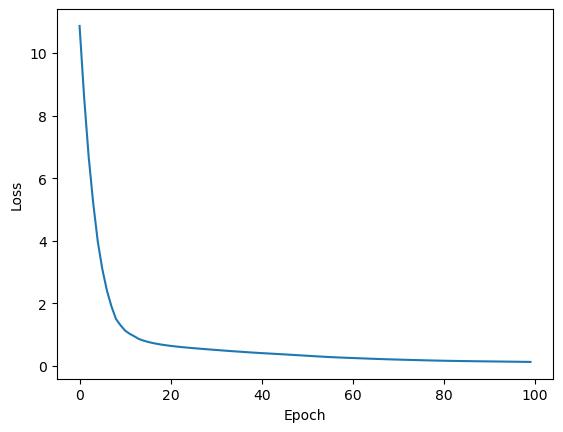

In [102]:
import matplotlib.pyplot as plt

plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [103]:
count=0
y_pred1=[]
for i in range(X_test.shape[0]):
    k=0
    if(model4(X_test[i].reshape((20,1)))[0][0]>0.5):
        k=1
    else:
        k=0
    
    y_pred1.append(k)
    if(k==y_test[i]):
        count+=1

In [104]:
count/y_test.shape[0]

0.966

In [105]:
f1_score(y_pred1,y_test)

0.41379310344827586

In [106]:
f1_score(y_pred,y_test)

0.3934426229508197

In [107]:
class FocalLoss(nn.Module):
    def __init__(self, gamma=2.0, alpha=None, reduction='mean'):
        super(FocalLoss, self).__init__()
        self.gamma = gamma
        self.alpha = alpha
        if self.alpha is not None:
            self.alpha = torch.Tensor(alpha)
        self.reduction = reduction

    def forward(self, probs, targets):
        # Compute softmax probabilities
    

        # Compute binary cross entropy
        bce_loss = nn.BCELoss(reduction='none')(probs, targets)

        # Compute focal loss
        focal_weights = (1 - probs) ** self.gamma
        focal_loss = torch.where(targets == 1, focal_weights * bce_loss, (probs ** self.gamma) * bce_loss)

        # Apply class weights if provided
        if self.alpha is not None:
            focal_loss = self.alpha[targets] * focal_loss

        # Compute final loss based on reduction option
        if self.reduction == 'mean':
            focal_loss = torch.mean(focal_loss)
        elif self.reduction == 'sum':
            focal_loss = torch.sum(focal_loss)

        return focal_loss


In [108]:
model4=nntree_gen(20,5)

In [267]:
criterion=FocalLoss()
optimizer=torch.optim.Adam(model4.parameters(),lr=0.01)

In [269]:
num_epochs=100
epoch=0
for epoch in range(num_epochs):
    output=model4(X_train[:].T)
    loss=criterion(output[:,0],y_train)
    optimizer.zero_grad()
    loss.backward()
#     for name, param in mobdel4.named_parameters():
#         if param.grad is not None:
#             print(f'Gradient of parameter {name}:')
#             print(param.grad)
    optimizer.step()
    print(loss)

tensor(0.1147, grad_fn=<MeanBackward0>)
tensor(0.1139, grad_fn=<MeanBackward0>)
tensor(0.1131, grad_fn=<MeanBackward0>)
tensor(0.1124, grad_fn=<MeanBackward0>)
tensor(0.1116, grad_fn=<MeanBackward0>)
tensor(0.1108, grad_fn=<MeanBackward0>)
tensor(0.1100, grad_fn=<MeanBackward0>)
tensor(0.1093, grad_fn=<MeanBackward0>)
tensor(0.1085, grad_fn=<MeanBackward0>)
tensor(0.1077, grad_fn=<MeanBackward0>)
tensor(0.1069, grad_fn=<MeanBackward0>)
tensor(0.1060, grad_fn=<MeanBackward0>)
tensor(0.1052, grad_fn=<MeanBackward0>)
tensor(0.1045, grad_fn=<MeanBackward0>)
tensor(0.1037, grad_fn=<MeanBackward0>)
tensor(0.1030, grad_fn=<MeanBackward0>)
tensor(0.1022, grad_fn=<MeanBackward0>)
tensor(0.1014, grad_fn=<MeanBackward0>)
tensor(0.1006, grad_fn=<MeanBackward0>)
tensor(0.0998, grad_fn=<MeanBackward0>)
tensor(0.0991, grad_fn=<MeanBackward0>)
tensor(0.0983, grad_fn=<MeanBackward0>)
tensor(0.0976, grad_fn=<MeanBackward0>)
tensor(0.0968, grad_fn=<MeanBackward0>)
tensor(0.0961, grad_fn=<MeanBackward0>)


In [276]:
count=0
y_pred1=[]
for i in range(X_test.shape[0]):
    k=0
    if(model4(X_test[i].reshape((20,1)))[0][0]>0.5):
        k=1
    else:
        k=0
    
    y_pred1.append(k)
    if(k==y_test[i]):
        count+=1

In [277]:
count/y_test.shape[0]

0.8840738043214372

In [278]:
f1_score(y_pred1,y_test)

0.3696369636963696

#### Diabetes dataset(more attributes and not skewed)

In [364]:
df=pd.read_csv("data.csv")

In [365]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [366]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [367]:

df = df.drop('id', axis=1)


In [368]:
df = df.drop("Unnamed: 32", axis=1)

In [369]:
Categorical_variables=["diagnosis"]

feature_scale=[feature for feature in df.columns if feature not in Categorical_variables]


scaler=StandardScaler()
scaler.fit(df[feature_scale])

StandardScaler()

In [370]:
scaled_data = pd.concat([df[['diagnosis']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(df[feature_scale]), columns=feature_scale)],
                    axis=1)
scaled_data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,M,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,M,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,M,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,M,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [371]:
df=scaled_data

In [372]:
df['diagnosis'] = df['diagnosis'].astype('category').cat.codes

In [373]:
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,1,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,1,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635


In [374]:
y=df["diagnosis"]

In [375]:
X=df.drop('diagnosis', axis=1)

In [376]:
from sklearn import tree
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
)


clf = tree.DecisionTreeClassifier(random_state=42)

clf.fit(X=X_train, y=y_train)

y_pred = clf.predict(X_test)
clf.score(X_test,y_test)

0.9473684210526315

In [377]:
clf.score(X_train,y_train)

1.0

In [378]:
X_train=X_train.to_numpy()
y_train=y_train.to_numpy()
X_test=X_test.to_numpy()
y_test=y_test.to_numpy()
X_train=torch.tensor(X_train.astype("float32"))
X_test=torch.tensor(X_test.astype("float32"))
y_train=torch.tensor(y_train.astype("float32"))
y_test=torch.tensor(y_test.astype("float32"))

In [379]:
model4=nntree_gen(30,5)
criterion=FocalLoss()
optimizer=torch.optim.Adam(model4.parameters(),lr=0.01)

In [380]:
num_epochs=100
epoch=0
for epoch in range(num_epochs):
    output=model4(X_train[:].T)
    loss=criterion(output[:,0],y_train)
    optimizer.zero_grad()
    loss.backward()
#     for name, param in mobdel4.named_parameters():
#         if param.grad is not None:
#             print(f'Gradient of parameter {name}:')
#             print(param.grad)
    optimizer.step()
    print(loss)

tensor(1.4350, grad_fn=<MeanBackward0>)
tensor(1.1524, grad_fn=<MeanBackward0>)
tensor(1.0689, grad_fn=<MeanBackward0>)
tensor(1.0327, grad_fn=<MeanBackward0>)
tensor(1.0033, grad_fn=<MeanBackward0>)
tensor(0.9768, grad_fn=<MeanBackward0>)
tensor(0.7655, grad_fn=<MeanBackward0>)
tensor(0.7381, grad_fn=<MeanBackward0>)
tensor(0.7106, grad_fn=<MeanBackward0>)
tensor(0.6851, grad_fn=<MeanBackward0>)
tensor(0.6625, grad_fn=<MeanBackward0>)
tensor(0.6433, grad_fn=<MeanBackward0>)
tensor(0.6276, grad_fn=<MeanBackward0>)
tensor(0.6184, grad_fn=<MeanBackward0>)
tensor(0.6115, grad_fn=<MeanBackward0>)
tensor(0.6052, grad_fn=<MeanBackward0>)
tensor(0.5996, grad_fn=<MeanBackward0>)
tensor(0.5945, grad_fn=<MeanBackward0>)
tensor(0.5899, grad_fn=<MeanBackward0>)
tensor(0.5855, grad_fn=<MeanBackward0>)
tensor(0.5816, grad_fn=<MeanBackward0>)
tensor(0.5780, grad_fn=<MeanBackward0>)
tensor(0.5748, grad_fn=<MeanBackward0>)
tensor(0.5719, grad_fn=<MeanBackward0>)
tensor(0.5691, grad_fn=<MeanBackward0>)


In [214]:
count=0
y_pred1=[]
for i in range(X_test.shape[0]):
    k=0
    if(model4(X_test[i].reshape((30,1)))[0][0]>0.5):
        k=1
    else:
        k=0
    
    y_pred1.append(k)
    if(k==y_test[i]):
        count+=1

# Madelon Data

In [458]:
train=pd.read_csv("madelon_train.data",delimiter=' ', header=None)

In [459]:
train

,0,1,2,3,4,5,6,7,8,9,...,491,492,493,494,495,496,497,498,499,500
0,485,477,537,479,452,471,491,476,475,473,...,481,477,485,511,485,481,479,475,496,NaN
1,483,458,460,487,587,475,526,479,485,469,...,478,487,338,513,486,483,492,510,517,NaN
2,487,542,499,468,448,471,442,478,480,477,...,481,492,650,506,501,480,489,499,498,NaN
3,480,491,510,485,495,472,417,474,502,476,...,480,474,572,454,469,475,482,494,461,NaN
4,484,502,528,489,466,481,402,478,487,468,...,479,452,435,486,508,481,504,495,511,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,490,505,503,474,463,461,519,476,518,467,...,479,449,588,499,506,475,463,507,501,NaN
1996,480,475,476,480,495,482,515,479,480,484,...,474,473,424,454,570,476,493,465,485,NaN
1997,480,517,631,470,485,474,535,476,493,466,...,483,479,687,488,488,483,500,523,481,NaN
1998,484,481,505,478,542,477,518,477,510,472,...,483,526,750,486,529,484,473,527,485,NaN


In [460]:
train_labels= pd.read_csv("madelon_train.labels",delimiter=' ', header=None)

In [461]:
train=train.drop(500,axis=1)

In [462]:
train.iloc[0]

0      485
1      477
2      537
3      479
4      452
      ... 
495    485
496    481
497    479
498    475
499    496
Name: 0, Length: 500, dtype: int64

In [463]:
feature_scale=[feature for feature in train.columns]


scaler=StandardScaler()
scaler.fit(train[feature_scale])

StandardScaler()

In [464]:
train[feature_scale]

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,485,477,537,479,452,471,491,476,475,473,...,477,481,477,485,511,485,481,479,475,496
1,483,458,460,487,587,475,526,479,485,469,...,463,478,487,338,513,486,483,492,510,517
2,487,542,499,468,448,471,442,478,480,477,...,487,481,492,650,506,501,480,489,499,498
3,480,491,510,485,495,472,417,474,502,476,...,491,480,474,572,454,469,475,482,494,461
4,484,502,528,489,466,481,402,478,487,468,...,488,479,452,435,486,508,481,504,495,511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,490,505,503,474,463,461,519,476,518,467,...,467,479,449,588,499,506,475,463,507,501
1996,480,475,476,480,495,482,515,479,480,484,...,464,474,473,424,454,570,476,493,465,485
1997,480,517,631,470,485,474,535,476,493,466,...,501,483,479,687,488,488,483,500,523,481
1998,484,481,505,478,542,477,518,477,510,472,...,487,483,526,750,486,529,484,473,527,485


In [465]:
scaled_data = pd.DataFrame(scaler.transform(train[feature_scale]), columns=feature_scale)
train=scaled_data

In [466]:
X=train

In [467]:
train_labels[0] = train_labels[0].astype('category').cat.codes

In [468]:
y=train_labels

In [481]:
from sklearn import tree
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
)


clf = tree.DecisionTreeClassifier(random_state=42)

clf.fit(X=X_train, y=y_train)

y_pred = clf.predict(X_test)
clf.score(X_test,y_test)

0.755

In [482]:
X_train=X_train.to_numpy()
y_train=y_train.to_numpy()
X_test=X_test.to_numpy()
y_test=y_test.to_numpy()
X_train=torch.tensor(X_train.astype("float32"))
X_test=torch.tensor(X_test.astype("float32"))
y_train=torch.tensor(y_train.astype("float32"))
y_test=torch.tensor(y_test.astype("float32"))

In [483]:
y_train=y_train.reshape(y_train.shape[0])


In [486]:
model4=nntree_gen(500,10)

In [489]:
criterion=nn.BCELoss()
optimizer=torch.optim.Adam(model4.parameters(),lr=0.01)

In [490]:
num_epochs=100
epoch=0
for epoch in range(num_epochs):
    output=model4(X_train.T)
    loss=criterion(output[:,0],y_train)
    optimizer.zero_grad()
    loss.backward()
#     for name, param in model4.named_parameters():
#         if param.grad is not None:
#             print(f'Gradient of parameter {name}:')
#             print(param.grad)
    optimizer.step()
    print(loss)

tensor(26.0833, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(26.0699, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(26.0906, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(26.1213, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(26.0699, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(26.0748, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(26.0394, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(25.9285, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(25.9240, grad_fn=<BinaryCrossEntropyBackward0>)


KeyboardInterrupt: 

In [491]:
count=0
y_pred1=[]
for i in range(X_test.shape[0]):
    k=0
    if(model4(X_test[i].reshape((500,1)))[0][0]>0.5):
        k=1
    else:
        k=0
    
    y_pred1.append(k)
    if(k==y_test[i]):
        count+=1

KeyboardInterrupt: 

In [496]:
count/X_test.shape[0]

0.4625

In [450]:
count=0
y_pred1=[]
for i in range(X_test.shape[0]):
    print(model4(X_test[i].reshape((500,1))))
    print(y_test[i])

tensor([[4.3246e-38, 1.0000e+00]], grad_fn=<SoftmaxBackward0>)
tensor([1.])
tensor([[2.3779e-24, 1.0000e+00]], grad_fn=<SoftmaxBackward0>)
tensor([0.])
tensor([[0.7075, 0.2925]], grad_fn=<SoftmaxBackward0>)
tensor([0.])
tensor([[0., 1.]], grad_fn=<SoftmaxBackward0>)
tensor([0.])
tensor([[5.9630e-28, 1.0000e+00]], grad_fn=<SoftmaxBackward0>)
tensor([0.])
tensor([[0.3925, 0.6075]], grad_fn=<SoftmaxBackward0>)
tensor([1.])
tensor([[0.1256, 0.8744]], grad_fn=<SoftmaxBackward0>)
tensor([1.])
tensor([[1., 0.]], grad_fn=<SoftmaxBackward0>)
tensor([1.])
tensor([[1.0000e+00, 3.4245e-06]], grad_fn=<SoftmaxBackward0>)
tensor([0.])
tensor([[1., 0.]], grad_fn=<SoftmaxBackward0>)
tensor([0.])
tensor([[1.4073e-28, 1.0000e+00]], grad_fn=<SoftmaxBackward0>)
tensor([1.])
tensor([[1., 0.]], grad_fn=<SoftmaxBackward0>)
tensor([0.])
tensor([[1., 0.]], grad_fn=<SoftmaxBackward0>)
tensor([1.])
tensor([[1.0000e+00, 3.6658e-26]], grad_fn=<SoftmaxBackward0>)
tensor([0.])
tensor([[1., 0.]], grad_fn=<SoftmaxBackw